# Clustering & Anamoly Detection of the World & Individual 


***
### Objective
To find out which factors are most prominent for happiness in the world and individual regions. (Looking for differentiating factor among different clusters)
***

In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set() 

In [3]:
raw_data = pd.read_excel('Data.xlsx', sheet_name = 'Sheet1')
raw_data.head()

,Country,Region indicator,"Life ladder, 2015-2017","Standard error, life ladder, 2015-2017","Log of GDP per person, 2015-2017","GDP per person, 2015-2017","Healthy life expectancy, 2015-2017","Social support, 2015-2017","Standard error, social support, 2015-2017","Freedom to make life choices, 2015-2017","Standard error, freedom to make life choices, 2015-2017","Generosity, 2015-2017, without adjustment for GDP per person","Standard error, generosity, 2015-2017","Perceptions of corruption, 2015-2017","Standard error, perceptions of corruption, 2015-2017"
0,Afghanistan,South Asia,3.631519,0.042360,7.462610,1741.687500,52.013329,0.525075,0.011119,0.445294,0.011449,0.179054,0.008331,0.879705,0.006009
1,Albania,Central and Eastern Europe,4.586040,0.055813,9.338126,11363.095703,68.871552,0.639576,0.010078,0.726340,0.009421,0.259975,0.009048,0.886778,0.005775
2,Algeria,Middle East and North Africa,5.294638,0.057087,9.540703,13914.723633,65.604858,0.776977,0.011171,0.439177,0.019161,0.128988,0.012327,0.698343,0.019293
3,Angola,Sub-Saharan Africa,3.794838,0.079919,8.741957,6260.132812,52.460709,0.765275,0.015744,0.374173,0.018346,0.106829,0.011499,0.833540,0.016014
4,Argentina,Latin America and Caribbean,6.387958,0.049497,9.842001,18807.310547,67.398483,0.905565,0.006363,0.853390,0.007526,0.163174,0.007777,0.847882,0.006881


In [4]:
print("Type : ", type(raw_data))
print("Shape: ", raw_data.shape)

Type :  <class 'pandas.core.frame.DataFrame'>
Shape:  (156, 15)


# DATA CLEANING for Clustering

***
1. Making all Column names uppercase
2. Removing 2015-2017 at the end of the columns
3. Replacing spaces with '_'
4. Setting Country Name as Index
5. Replacing NULL Values with the mean of the column
6. Dropping non-essential columns
***

In [5]:
world_data = raw_data.copy()

In [6]:
world_data.columns = world_data.columns.str.upper()
world_data.columns = world_data.columns.str.replace(", 2015-2017","")
world_data.columns = world_data.columns.str.replace(" ","_")

In [7]:
# Setting Name as Index
Country=world_data['COUNTRY']
world_data = world_data.set_index('COUNTRY')

In [8]:
world_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156 entries, Afghanistan to Zimbabwe
Data columns (total 14 columns):
REGION_INDICATOR                                     156 non-null object
LIFE_LADDER                                          156 non-null float64
STANDARD_ERROR,_LIFE_LADDER                          156 non-null float64
LOG_OF_GDP_PER_PERSON                                152 non-null float64
GDP_PER_PERSON                                       152 non-null float64
HEALTHY_LIFE_EXPECTANCY                              153 non-null float64
SOCIAL_SUPPORT                                       155 non-null float64
STANDARD_ERROR,_SOCIAL_SUPPORT                       155 non-null float64
FREEDOM_TO_MAKE_LIFE_CHOICES                         155 non-null float64
STANDARD_ERROR,_FREEDOM_TO_MAKE_LIFE_CHOICES         155 non-null float64
GENEROSITY,_WITHOUT_ADJUSTMENT_FOR_GDP_PER_PERSON    155 non-null float64
STANDARD_ERROR,_GENEROSITY                           155 non-null float6

In [9]:
world_data = world_data.drop(["STANDARD_ERROR,_LIFE_LADDER", "LOG_OF_GDP_PER_PERSON", "STANDARD_ERROR,_SOCIAL_SUPPORT","STANDARD_ERROR,_FREEDOM_TO_MAKE_LIFE_CHOICES","STANDARD_ERROR,_GENEROSITY","STANDARD_ERROR,_PERCEPTIONS_OF_CORRUPTION"], axis=1)

In [10]:
world_data.rename(columns={'GENEROSITY,_WITHOUT_ADJUSTMENT_FOR_GDP_PER_PERSON':'GENEROSITY',
                       'FREEDOM_TO_MAKE_LIFE_CHOICES':'FREEDOM_CHOICES',
                       'PERCEPTIONS_OF_CORRUPTION':'CORRUPTION',
                       'PERCEPTIONS_OF_CORRUPTION':'CORRUPTION', 
                       'HEALTHY_LIFE_EXPECTANCY': 'LIFE_EXPECTANCY'},
              inplace=True)

In [11]:
world_data.isnull().sum()

REGION_INDICATOR    0
LIFE_LADDER         0
GDP_PER_PERSON      4
LIFE_EXPECTANCY     3
SOCIAL_SUPPORT      1
FREEDOM_CHOICES     1
GENEROSITY          1
CORRUPTION          8
dtype: int64

In [12]:
for col in world_data:
    if col == "REGION_INDICATOR":
        continue
        
    world_data[col].fillna(value = world_data[col].mean(), inplace = True)

In [13]:
world_data.isnull().sum()

REGION_INDICATOR    0
LIFE_LADDER         0
GDP_PER_PERSON      0
LIFE_EXPECTANCY     0
SOCIAL_SUPPORT      0
FREEDOM_CHOICES     0
GENEROSITY          0
CORRUPTION          0
dtype: int64

## Rescaling the variables (Out of 100)

***
#### Scaling all the variables to a percentage
__Life Ladder__: Multiplying by a factor of 10 <br>
__Social Support, Freedom of Choices, Generosity & Corruption__: By a factor of 100 (since they are out of 1)<br>
__GPD__: as a percantage of the maximum GDP
***

In [14]:
#LIFE_LADDER
world_data["LIFE_LADDER"]*=10


#SOCIAL_SUPPORT , FREEDOM_CHOICES , GENEROSITY , CORRUPTION
for col in world_data:
    if col in ["SOCIAL_SUPPORT", "FREEDOM_CHOICES","GENEROSITY", "CORRUPTION"]:
               world_data[col]*=100

#GDP_PER_PERSON
gdp=world_data["GDP_PER_PERSON"].max()
world_data["GDP_PER_PERSON"]=world_data["GDP_PER_PERSON"]/gdp *100

In [15]:
world_data.describe()

,LIFE_LADDER,GDP_PER_PERSON,LIFE_EXPECTANCY,SOCIAL_SUPPORT,FREEDOM_CHOICES,GENEROSITY,CORRUPTION
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,53.758809,15.841261,62.669026,80.247170,75.748097,30.031281,74.014582
std,11.195568,16.452971,7.684724,12.272176,13.625279,17.734643,17.691115
min,29.045351,0.541030,43.994526,30.556536,37.417275,3.371710,10.311358
25%,44.534829,3.874306,57.275132,74.552748,67.542510,16.811408,69.787203
50%,53.780205,11.024820,64.039000,81.848475,78.398049,25.922567,79.521781
75%,61.684413,22.068547,68.292009,90.330550,86.087947,38.779006,85.153566
max,76.321020,100.000000,75.720833,97.749740,98.357320,89.988649,94.665253


C:\Users\Aditya\Downloads\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


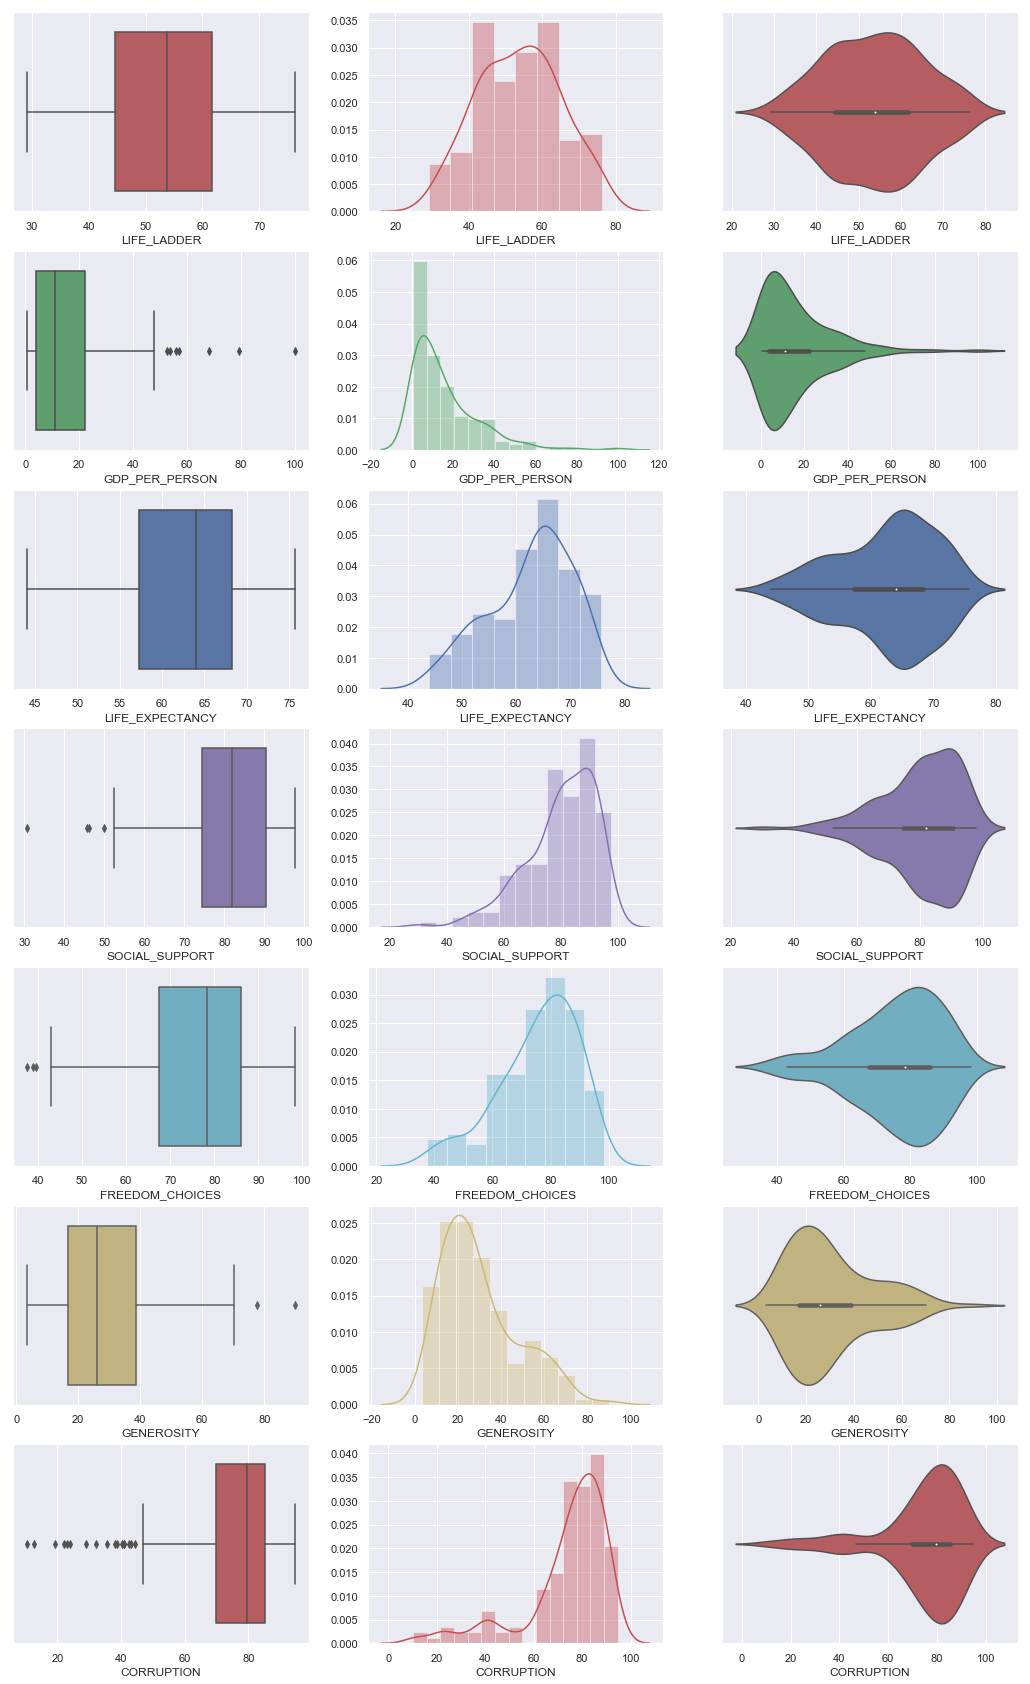

In [16]:
f, axes = plt.subplots(7, 3, figsize=(18, 30))
colors = ["r", "g", "b", "m", "c", "y","r"]

count = 0
for var in world_data:
        if var== "REGION_INDICATOR":
            continue
        sb.boxplot(world_data[var], orient = "h",color= colors[count], ax = axes[count,0])
        sb.distplot(world_data[var],  color= colors[count], ax = axes[count,1])
        sb.violinplot(world_data[var], color= colors[count], ax = axes[count,2])
        count += 1

# MULTI VARIATE CLUSTERING (On WORLD DATA) - Using KMeans

***
#### Since from EDA we concluded that the fairly important variables were GDP per person, Life Expectancy and Social Support
Clustering for the World Data has been done based on those. 
***

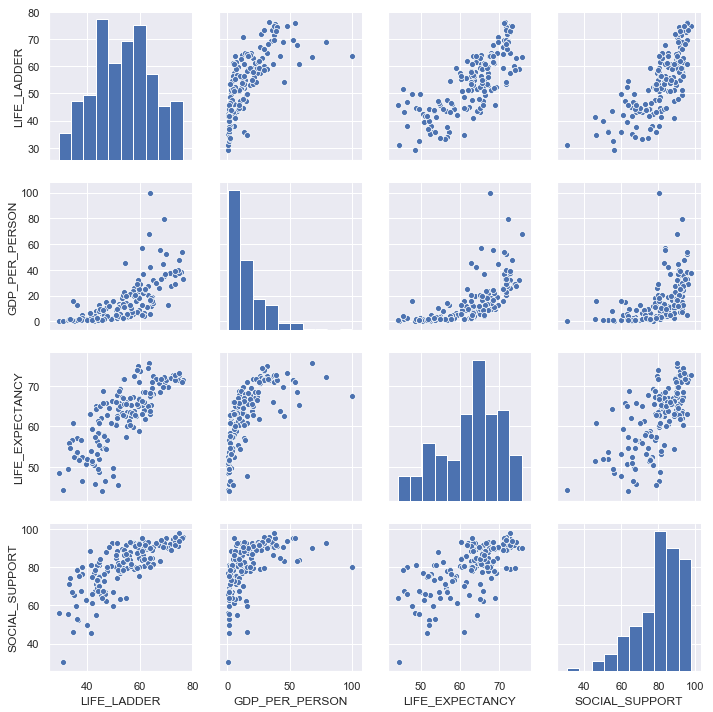

In [17]:
X = pd.DataFrame(world_data[["LIFE_LADDER","GDP_PER_PERSON","LIFE_EXPECTANCY","SOCIAL_SUPPORT"]])  # Extracting the relevant variables

# Pairplot of all the variables with each other
sb.pairplot(X)

In [18]:
from sklearn.cluster import KMeans

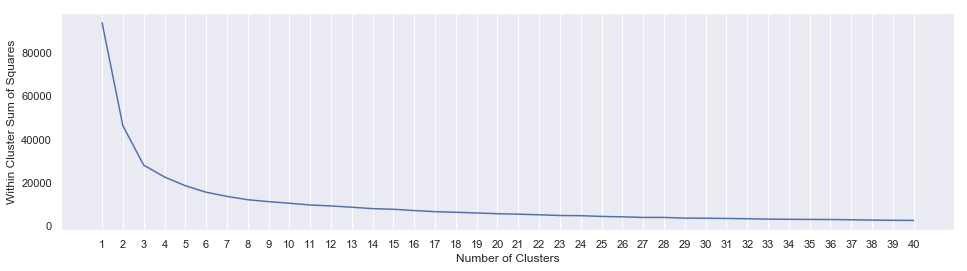

In [19]:
# To check number of optimum clusters
min_clust = 1
max_clust = 40
init_algo = 'k-means++'  #initliasing the algorithm

#Within Cluster Sum of Squares
within_ss = []
for num_clust in range(min_clust, max_clust+1):
    kmeans = KMeans(n_clusters = num_clust, init = init_algo, n_init = 5)
    kmeans.fit(X)
    within_ss.append(kmeans.inertia_)

# Angle Plot : Within SS vs Number of Clusters
f, axes = plt.subplots(1, 1, figsize=(16,4))
plt.plot(range(min_clust, max_clust+1), within_ss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.xticks(np.arange(min_clust, max_clust+1, 1.0))
plt.grid(which='major', axis='y')
plt.show()

In [20]:
# Set optimum number of clusters
num_clust = 3
init_algo = 'k-means++'


kmeans = KMeans(n_clusters = num_clust,         
               init = init_algo,
               n_init = 20)                 


kmeans.fit(X)  # Fitting the model on the Data

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=20, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Features LIFE_LADDER GDP_PER_PERSON LIFE_EXPECTANCY SOCIAL_SUPPORT FREEDOM_CHOICES GENEROSITY CORRUPTION

Cluster 0:	56.23	13.02	65.02	85.49	
Cluster 1:	41.89	4.06	54.6	66.79	
Cluster 2:	68.32	42.55	71.01	91.07	

Within Cluster Sum of Squares : 28159.299027744768



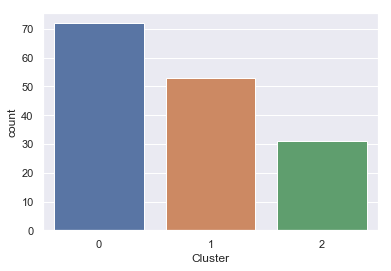

In [21]:
# Print the Cluster Centers
print("Features", "LIFE_LADDER","GDP_PER_PERSON","LIFE_EXPECTANCY","SOCIAL_SUPPORT","FREEDOM_CHOICES","GENEROSITY","CORRUPTION")
print()

for i, center in enumerate(kmeans.cluster_centers_):
    print("Cluster", i, end=":\t")
    for coord in center:
        print(round(coord, 2), end="\t")
    print()
print()

# Print the Within Cluster Sum of Squares
print("Within Cluster Sum of Squares :", kmeans.inertia_)
print()

# Predict the Cluster Labels
labels = kmeans.predict(X)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.countplot(X_labeled["Cluster"])

C:\Users\Aditya\Downloads\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


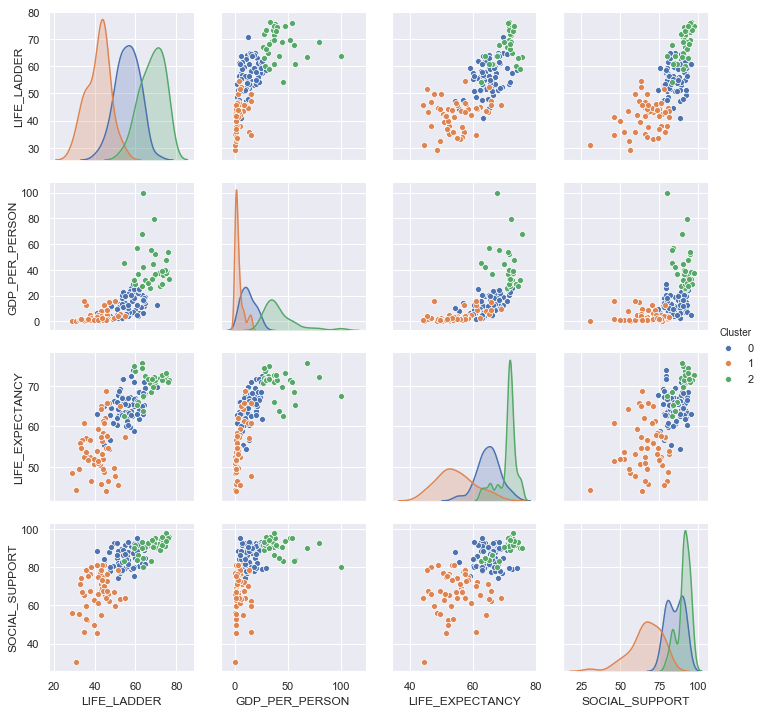

In [22]:
# Plot the Clusters on 2D grids
sb.pairplot(X_labeled, vars = X.columns.values, hue = "Cluster")

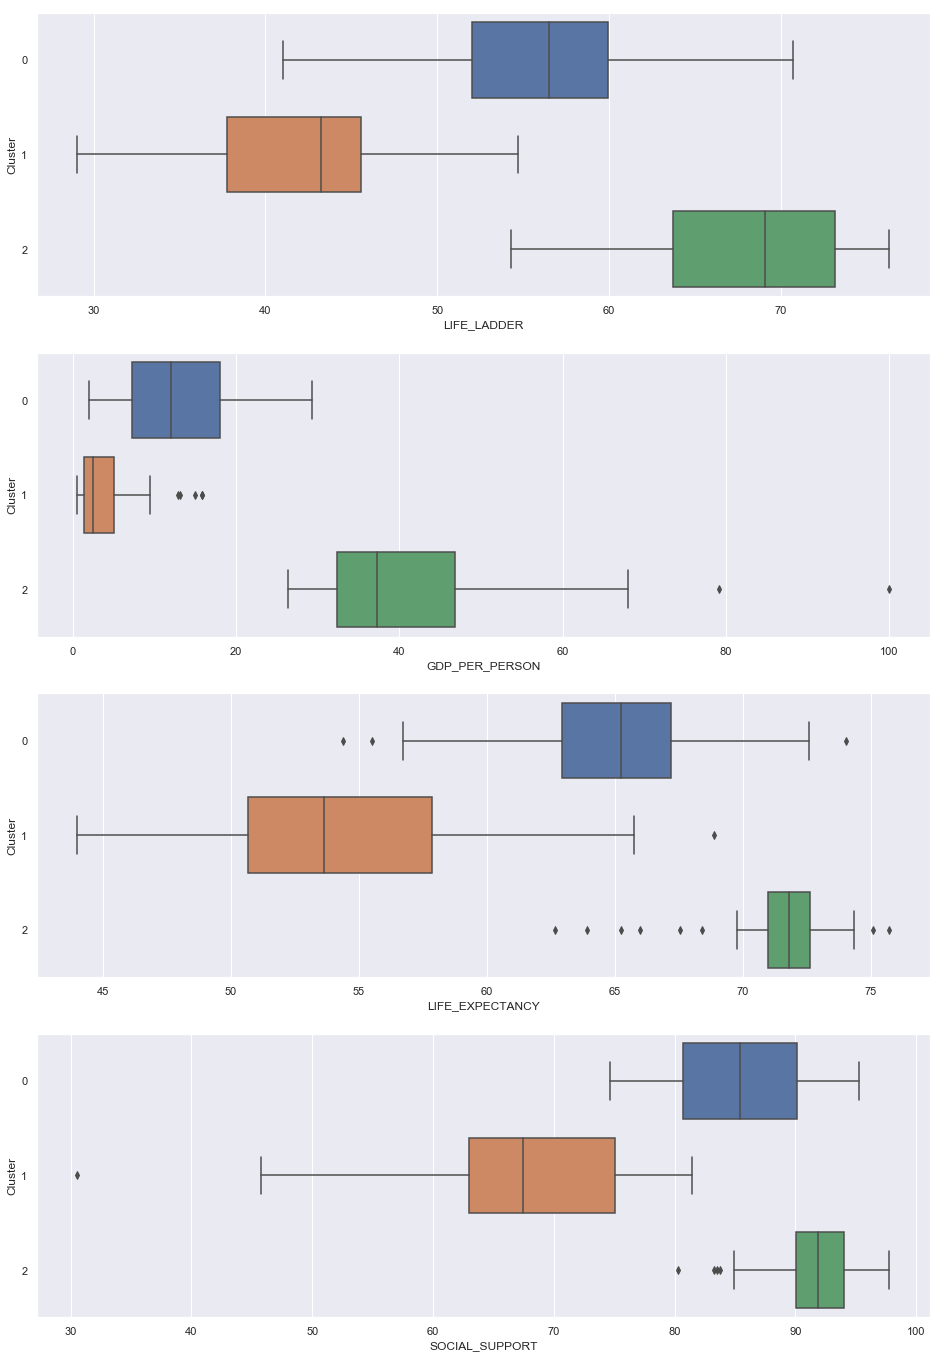

In [23]:
# Boxplots for all Features against the Clusters
f, axes = plt.subplots(4, 1, figsize=(16,24))
sb.boxplot(x = "LIFE_LADDER",y = 'Cluster', data = X_labeled, ax = axes[0])
sb.boxplot(x = "GDP_PER_PERSON", y = 'Cluster', data = X_labeled, ax = axes[1])
sb.boxplot(x = "LIFE_EXPECTANCY", y = 'Cluster', data = X_labeled, ax = axes[2])
sb.boxplot(x = "SOCIAL_SUPPORT", y = 'Cluster', data = X_labeled, ax = axes[3])
#sb.boxplot(x =  "FREEDOM_CHOICES", y = 'Cluster', data = X_labeled, ax = axes[4])
#sb.boxplot(x = "GENEROSITY", y = 'Cluster', data = X_labeled, ax = axes[5])

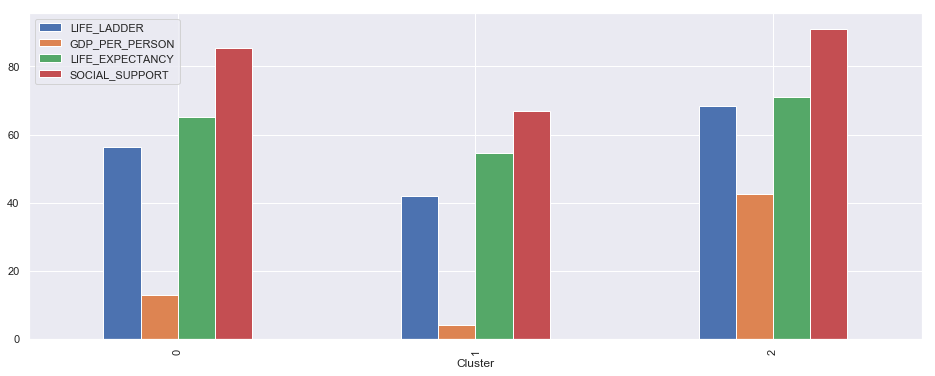

In [24]:
# Average Behaviour of each Cluster
cluster_data = pd.DataFrame(X_labeled.groupby(by = "Cluster").mean())
cluster_data.plot.bar(figsize = (16,6))

***
### Observation:
The optimum clustering was found out to be for Number Of Clusters = 3 
The three clusters can be viewed as 3 levels of happiness: Less Happy, Moderately Happy and Most Happy countries <br>
As can be seen, the three variables (GDP, Social Support & Life Expectancy) are also increasing in progression according to the different clusters.
***

### Visualisation on a World Map
Following is the distribution of the three clusters on the world map

In [25]:
import warnings
import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
%matplotlib inline
warnings.filterwarnings('ignore')

In [26]:
data = dict(type = 'choropleth', 
           locations = Country,
           locationmode = 'country names',
           z = X_labeled["Cluster"], 
           text = Country,
           colorbar = {'title':'Cluster Group'})
layout = dict(title = 'KMEANS Clustering Visualization', 
             geo = dict(showframe = True, 
                       projection = {'type': 'equirectangular'}))
choromap3 = go.Figure(data = [data], layout=layout)
plotly.offline.iplot(choromap3)

# Clustering using DBSCAN
***
In Kmeans++, we had to look for the optimum number of clusters and specify in the algorithm. <br>

For DBSCAN, we have to mention the min number of data points to form a cluster, and the maximum radius in which it can look for the samples (Epsilon) <br>
The algorithm forms the number of clusters accordingly. <br> <br>

Further, DBSCAN also labels the noise points i.e. the points which could not be grouped into any cluster. 
*** 

In [27]:
X = pd.DataFrame(world_data[["LIFE_LADDER","GDP_PER_PERSON","SOCIAL_SUPPORT","SOCIAL_SUPPORT"]]) 
#"FREEDOM_CHOICES","GENEROSITY","CORRUPTION",,"SOCIAL_SUPPORT

In [28]:
import sklearn

In [29]:
db = sklearn.cluster.DBSCAN(eps=6, min_samples=6)
DB = db.fit_predict(X)
print(DB)

[-1  0  0  0  1  0  2  2  0 -1  0  3  2 -1 -1  0  0  0 -1  1  3  0 -1  0
  0  2 -1  0 -1  0  1  0  0 -1  0 -1  1  2  3  0  0  0  1  0  2  1  0 -1
  2  0 -1 -1  0 -1  0 -1  1  2  0  0 -1 -1 -1 -1  1  0 -1  1  0  1  0  0
 -1 -1  0  1  0  0 -1  0  1 -1  0  0 -1 -1  0  1  0  1 -1  0  3  0 -1  0
  0  0  0  2  2  0  0  0 -1 -1 -1  0  1  3  0  0  1  1 -1 -1  1 -1 -1  0
  3  0 -1  1  1 -1 -1 -1 -1  1 -1  0  2 -1 -1  1  0 -1  1 -1  1  0  1 -1
  0 -1 -1  2 -1  1 -1  3  0 -1  0  0]


In [30]:
data = dict(type = 'choropleth', 
           locations = Country,
           locationmode = 'country names',
           z = DB, 
           text = Country,
           colorbar = {'title':'Cluster Group'})
layout = dict(title = 'DBSCAN Clustering Visualization', 
             geo = dict(showframe = True, 
                       projection = {'type': 'equirectangular'}))
choromap3 = go.Figure(data = [data], layout=layout)
plotly.offline.iplot(choromap3)

***
### Observation
As can be seen in the graph, the countries have been grouped into 4 clusters (& the noise points)<br>
The countries labelled as  ' -1 ' are the noise points (which can be considered anomalies to some extent).

***
## ANAMOLY DETECTION

Now, doing anamoly detection on the world dataset using Local Outlier Factor Algorithm, to look for countries with irregular beahviour.
***

In [31]:
X = pd.DataFrame(world_data[["LIFE_LADDER","GDP_PER_PERSON","LIFE_EXPECTANCY","FREEDOM_CHOICES","GENEROSITY","CORRUPTION","SOCIAL_SUPPORT"]]) 
#"FREEDOM_CHOICES","GENEROSITY","CORRUPTION",,"SOCIAL_SUPPORT,"SOCIAL_SUPPORT"


# Import LocalOutlierFactor from sklearn.neighbors
from sklearn.neighbors import LocalOutlierFactor

# Set the Parameters for Neighborhood
num_neighbors = 20     # Number of Neighbors
cont_fraction = 0.07    # Fraction of Anomalies

# Create Anomaly Detection Model using LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors = num_neighbors, contamination = cont_fraction)

# Fit the Model on the Data and Predict Anomalies
lof.fit(X)

LocalOutlierFactor(algorithm='auto', contamination=0.07, leaf_size=30,
          metric='minkowski', metric_params=None, n_jobs=None,
          n_neighbors=20, novelty=False, p=2)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1
  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1
  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1 -1  1  1
  1  1  1  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 -1  1  1  1  1  1]


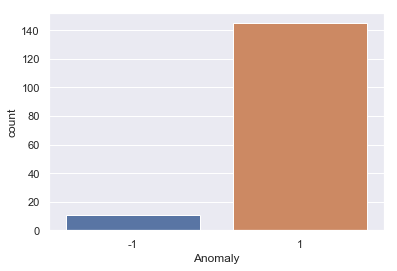

In [32]:
# Predict the Anomalies
labels = lof.fit_predict(X)
print(labels)

# Append Labels to the Data
X_labeled = X.copy()
X_labeled["Anomaly"] = pd.Categorical(labels)

# Summary of the Anomaly Labels
sb.countplot(X_labeled["Anomaly"])

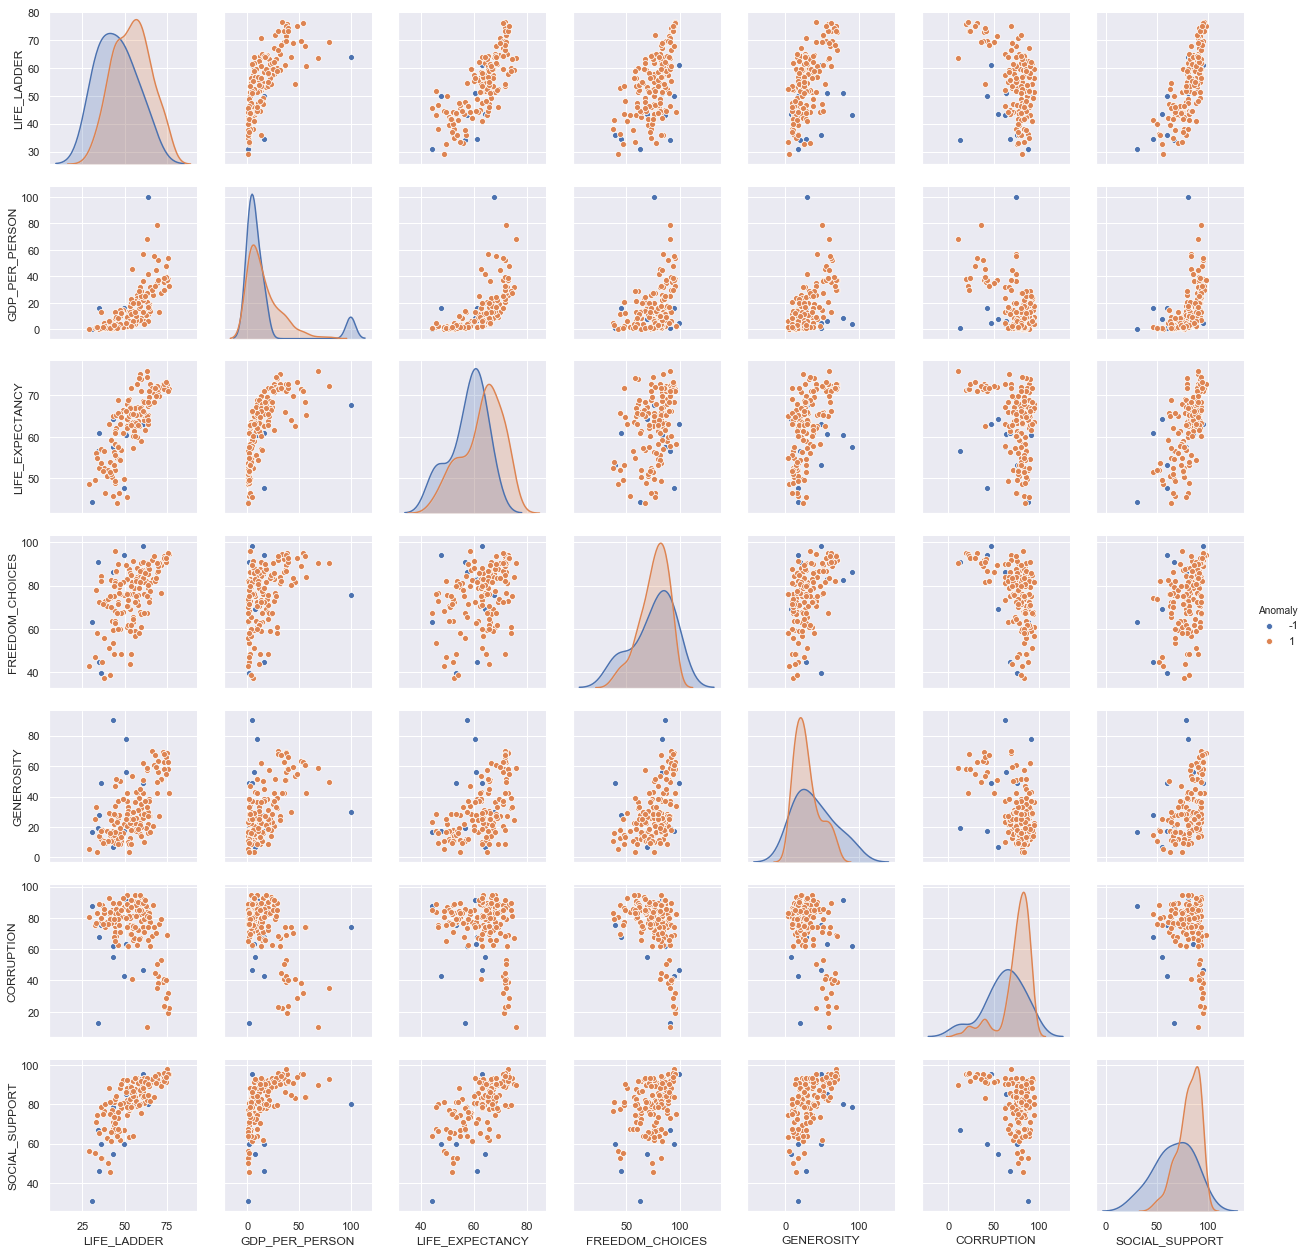

In [33]:
# Visualize the Anomalies in the Data
sb.pairplot(X_labeled, vars = X.columns.values, hue = "Anomaly")

In [34]:
data = dict(type = 'choropleth', 
           locations = Country,
           locationmode = 'country names',
           z = X_labeled["Anomaly"], 
           text = Country,
           colorbar = {'title':'Cluster Group'})
layout = dict(title = 'Anomaly Visualization', 
             geo = dict(showframe = True, 
                       projection = {'type': 'equirectangular'}))
choromap3 = go.Figure(data = [data], layout=layout)
plotly.offline.iplot(choromap3)


print("Following  are the countries with anolmalous behaviour: \n")
print("_______________________________________________________ \n")

for var, row in X_labeled.iterrows():
    if(X_labeled.loc[var,"Anomaly"]==-1):
        print(world_data.loc[var])
        print("\n")




Following  are the countries with anolmalous behaviour: 

_______________________________________________________ 

REGION_INDICATOR    South Asia
LIFE_LADDER            50.8213
GDP_PER_PERSON         6.46628
LIFE_EXPECTANCY        60.5679
SOCIAL_SUPPORT         85.0921
FREEDOM_CHOICES        82.9656
GENEROSITY             56.3592
CORRUPTION             63.1328
Name: Bhutan, dtype: object


REGION_INDICATOR    Sub-Saharan Africa
LIFE_LADDER                      30.83
GDP_PER_PERSON                 0.54103
LIFE_EXPECTANCY                44.3124
SOCIAL_SUPPORT                 30.5565
FREEDOM_CHOICES                63.0962
GENEROSITY                     16.7456
CORRUPTION                     87.5871
Name: Central African Republic, dtype: object


REGION_INDICATOR    Commonwealth of Independent States
LIFE_LADDER                                    43.4049
GDP_PER_PERSON                                 7.76336
LIFE_EXPECTANCY                                64.2198
SOCIAL_SUPPORT            

***
## Clustering For Indidual Regions

Now, doing clustering on the indivual regions of the world.
And looking for differentiating factors among different clusters in different regions.
***

In [35]:
# Relabelling the regions into broad categories (namely Asia, Africa, Europe , America, & Independent States) 

i=0;
for var, row in world_data.iterrows():    
    if "Asia" in world_data.loc[var,"REGION_INDICATOR"]:
        world_data.loc[var,"REGION_INDICATOR"]="ASIA"
    if "Europe" in world_data.loc[var,"REGION_INDICATOR"]:
        world_data.loc[var,"REGION_INDICATOR"]="EUROPE"
    if "America" in world_data.loc[var,"REGION_INDICATOR"]:
        world_data.loc[var,"REGION_INDICATOR"]="AMERICA"
    if "Africa" in world_data.loc[var,"REGION_INDICATOR"]:
        world_data.loc[var,"REGION_INDICATOR"]="AFRICA"
    
    i=i+1


In [36]:
#Creating differnt groups of sub-regions
groups = dict(iter(world_data.groupby("REGION_INDICATOR", as_index=False)))



AFRICA
Features LIFE_LADDER   GDP_PER_PERSON LIFE_EXPECTANCY   SOCIAL_SUPPORT   FREEDOM_CHOICES   GENEROSITY   CORRUPTION

Cluster 0:	39.27		4.59		54.94		66.36		50.25		13.67		79.8		
Cluster 1:	44.3		5.32		54.71		71.04		74.77		19.77		76.53		
Cluster 2:	63.98		47.9		66.94		85.02		83.45		44.41		76.45		

Within Cluster Sum of Squares : 31933.67327386838


AMERICA
Features LIFE_LADDER   GDP_PER_PERSON LIFE_EXPECTANCY   SOCIAL_SUPPORT   FREEDOM_CHOICES   GENEROSITY   CORRUPTION

Cluster 0:	41.94		6.82		58.89		75.16		44.06		31.16		80.34		
Cluster 1:	61.26		11.11		65.11		86.12		83.52		23.78		80.48		
Cluster 2:	72.03		36.77		71.55		93.64		90.32		64.94		43.19		

Within Cluster Sum of Squares : 6609.342839032971


ASIA
Features LIFE_LADDER   GDP_PER_PERSON LIFE_EXPECTANCY   SOCIAL_SUPPORT   FREEDOM_CHOICES   GENEROSITY   CORRUPTION

Cluster 0:	48.65		7.12		61.68		73.55		81.75		25.01		75.38		
Cluster 1:	54.21		13.11		64.67		84.45		77.56		56.96		81.01		
Cluster 2:	58.87		56.87		69.19		86.56		86.02

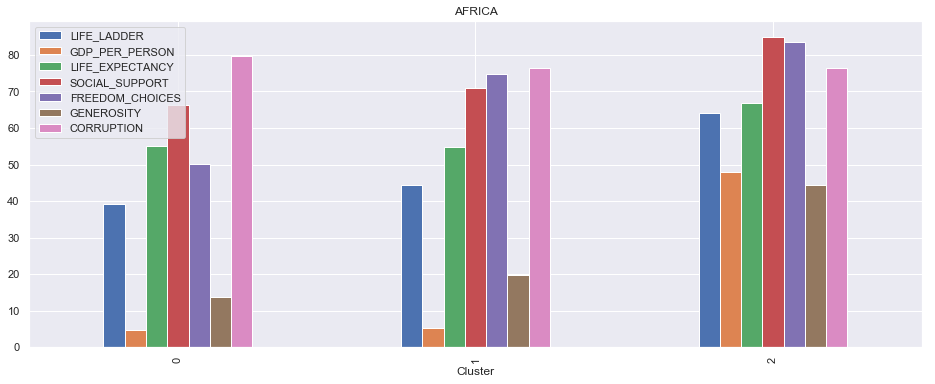

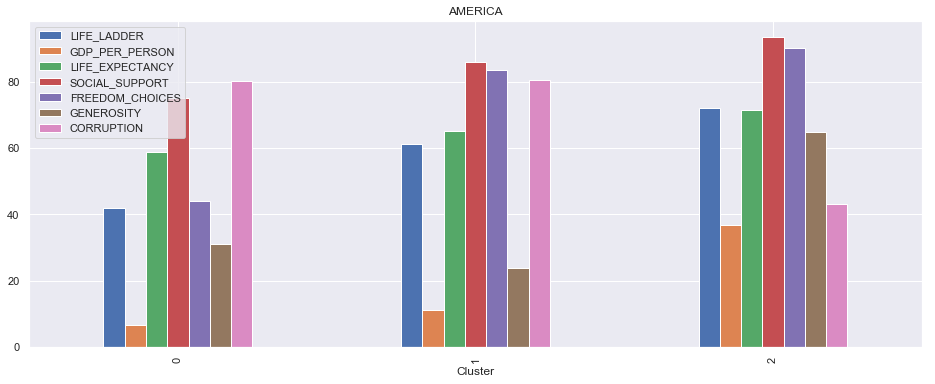

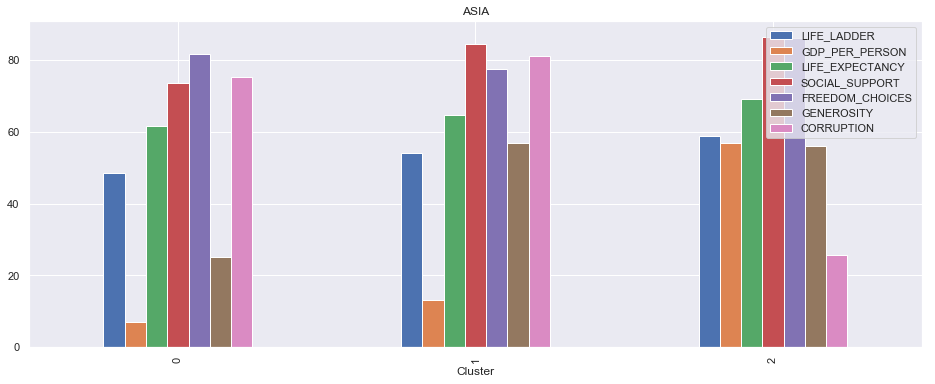

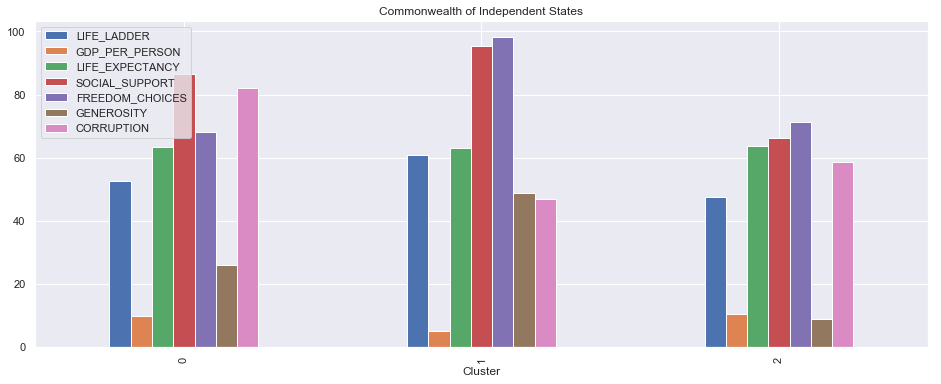

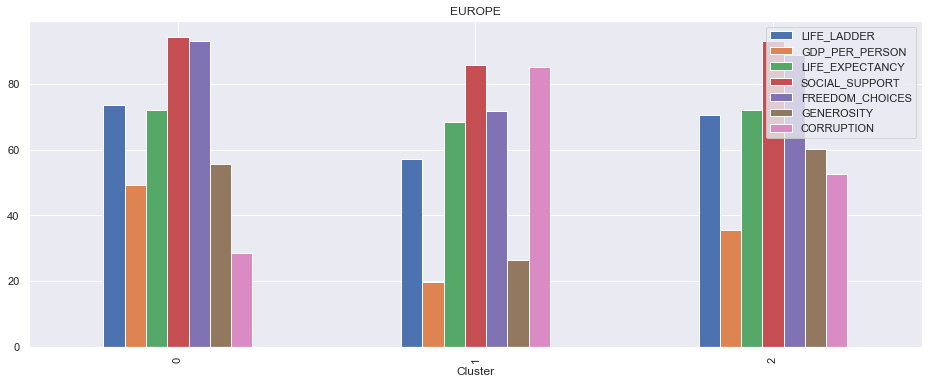

In [37]:
for var in groups:
    X = groups[var].drop("REGION_INDICATOR", axis=1)
    
    num_clust = 3
    init_algo = 'k-means++'


    kmeans = KMeans(n_clusters = num_clust,         
               init = init_algo,
               n_init = 20)                 


    kmeans.fit(X)
    
    
    # Print the Cluster Centers
    print("\n"+var)
    print("Features", "LIFE_LADDER","  GDP_PER_PERSON","LIFE_EXPECTANCY","  SOCIAL_SUPPORT","  FREEDOM_CHOICES","  GENEROSITY","  CORRUPTION")
    print()

    for i, center in enumerate(kmeans.cluster_centers_):
        print("Cluster", i, end=":\t")
        for coord in center:
            print(round(coord, 2), end="\t\t")
        print()
    print()

    # Print the Within Cluster Sum of Squares
    print("Within Cluster Sum of Squares :", kmeans.inertia_)
    print()

    # Predict the Cluster Labels
    labels = kmeans.predict(X)

    # Append Labels to the Data
    X_labeled = X.copy()
    X_labeled["Cluster"] = pd.Categorical(labels)
    
    # Average Behaviour of each Cluster
    cluster_data = pd.DataFrame(X_labeled.groupby(by = "Cluster").mean())
    cluster_data.plot.bar(figsize = (16,6), title=var)


***
Through the within cluster sum of squares, we can measure the accuracy of the clustering model on different regions.
The most accurate fit is on the Commonwealth of Independent States as well as America. <br><br>


Further by looking at the clusters the major factor leading to difference in happiness amongst different clusters can also be identified. 


***
# Conclusions
The most prominent factor affecting happiness in:<br>
__The World__: GDP, Life Expectancy & Social Support
#### Different sub-regions:
__Africa__ : GDP, Social Support, Corruption<br>
__America__: GDP, Generosity<br>
__Asia__   : GDP, Corruption<br>
__Europe__ : Freedom of Choice, Generosity<br>
__Independent States__: Social Support, Generosity